In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups(
    subset= 'all',
    remove=("headers", "footers", "quotes")
)

In [3]:
main_df = pd.DataFrame({
    "text": data.data, 
    "topic": data.target
})
main_df

,text,topic
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
18842,\nNot in isolated ground recepticles (usually ...,12
18843,I just installed a DX2-66 CPU in a clone mothe...,3
18844,\nWouldn't this require a hyper-sphere. In 3-...,1


In [4]:
main_df.isna().sum()

text     0
topic    0
dtype: int64

In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18846 non-null  object
 1   topic   18846 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 294.6+ KB


In [6]:
main_df.nunique()

text     18287
topic       20
dtype: int64

In [7]:
main_df['topic'].value_counts().sort_index(ascending=False)

topic
19    628
18    775
17    940
16    910
15    997
14    987
13    990
12    984
11    991
10    999
9     994
8     996
7     990
6     975
5     988
4     963
3     982
2     985
1     973
0     799
Name: count, dtype: int64

In [8]:
main_df.loc[main_df['topic']==0]['text']

14       \n\n\tThere is no notion of heliocentric, or e...
29       [ . . .]\n\nI am a relativist who would like t...
56       \n\nOh, Bobby. You're priceless. Did I ever te...
140      \n\nOr he was just convinced by religious fant...
173      \nActually, I've got an entire list of books w...
                               ...                        
18762    Here's a suggestion for the logical argument F...
18776    \n\nThat's right.  Humans have gone somewhat b...
18812    Archive-name: atheism/resources\nAlt-atheism-a...
18818    \n\n\nI'm sure there are many people who work ...
18820    A new alternative to Scouting for those "unacc...
Name: text, Length: 799, dtype: object

In [9]:
main_df['text']= main_df['text'].str.strip().str.lower()

In [10]:
main_df

,text,topic
0,i am sure some bashers of pens fans are pretty...,10
1,my brother is in the market for a high-perform...,3
2,finally you said what you dream about. mediter...,17
3,think!\n\nit's the scsi card doing the dma tra...,3
4,1) i have an old jasmine drive which i cann...,4
...,...,...
18841,dn> from: nyeda@cnsvax.uwec.edu (david nye)\nd...,13
18842,not in isolated ground recepticles (usually an...,12
18843,i just installed a dx2-66 cpu in a clone mothe...,3
18844,wouldn't this require a hyper-sphere. in 3-sp...,1


In [11]:
main_df['topic'].max()

np.int64(19)

In [12]:
main_df['topic'].min()

np.int64(0)

In [13]:
print(repr(main_df['text'].iloc[98][0:100]))

'has anyone publically considered the possibility that the fires were set\nfor defence instead of suic'


In [14]:
import re




In [15]:
tmp_df =main_df.copy()

In [16]:
tmp_df['paragraphs'] = main_df['text'].map(lambda text :re.split('[.?!]\s*\n',text))

In [17]:
tmp_df

,text,topic,paragraphs
0,i am sure some bashers of pens fans are pretty...,10,[i am sure some bashers of pens fans are prett...
1,my brother is in the market for a high-perform...,3,[my brother is in the market for a high-perfor...
2,finally you said what you dream about. mediter...,17,[finally you said what you dream about. medite...
3,think!\n\nit's the scsi card doing the dma tra...,3,"[think, it's the scsi card doing the dma trans..."
4,1) i have an old jasmine drive which i cann...,4,[1) i have an old jasmine drive which i can...
...,...,...,...
18841,dn> from: nyeda@cnsvax.uwec.edu (david nye)\nd...,13,[dn> from: nyeda@cnsvax.uwec.edu (david nye)\n...
18842,not in isolated ground recepticles (usually an...,12,[not in isolated ground recepticles (usually a...
18843,i just installed a dx2-66 cpu in a clone mothe...,3,[i just installed a dx2-66 cpu in a clone moth...
18844,wouldn't this require a hyper-sphere. in 3-sp...,1,[wouldn't this require a hyper-sphere. in 3-s...


In [18]:
tmp_df['number_of_paraghs'] = tmp_df['paragraphs'].map(len)

In [19]:
tmp_df

,text,topic,paragraphs,number_of_paraghs
0,i am sure some bashers of pens fans are pretty...,10,[i am sure some bashers of pens fans are prett...,1
1,my brother is in the market for a high-perform...,3,[my brother is in the market for a high-perfor...,2
2,finally you said what you dream about. mediter...,17,[finally you said what you dream about. medite...,12
3,think!\n\nit's the scsi card doing the dma tra...,3,"[think, it's the scsi card doing the dma trans...",5
4,1) i have an old jasmine drive which i cann...,4,[1) i have an old jasmine drive which i can...,2
...,...,...,...,...
18841,dn> from: nyeda@cnsvax.uwec.edu (david nye)\nd...,13,[dn> from: nyeda@cnsvax.uwec.edu (david nye)\n...,8
18842,not in isolated ground recepticles (usually an...,12,[not in isolated ground recepticles (usually a...,1
18843,i just installed a dx2-66 cpu in a clone mothe...,3,[i just installed a dx2-66 cpu in a clone moth...,2
18844,wouldn't this require a hyper-sphere. in 3-sp...,1,[wouldn't this require a hyper-sphere. in 3-s...,2


In [ ]:
tmp_df['text'] = (
    tmp_df['text']
    .str.lower()
    .str.replace(r'[\n\r\t\-]', ' ', regex=True) 
    .str.replace(r'[^\w\s]', ' ', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

In [ ]:
'''
\r → Windows satır başı
\t → Tab
- → tire / madde işareti
^ → hariç
\w → harf + rakam + _
\s → boşluk
\s → boşluk, newline, tab
+ → 1 veya daha fazla


In [22]:
tmp_df['text']

0        i am sure some bashers of pens fans are pretty...
1        my brother is in the market for a high perform...
2        finally you said what you dream about mediterr...
3        think it s the scsi card doing the dma transfe...
4        1 i have an old jasmine drive which i cannot u...
                               ...                        
18841    dn from nyeda cnsvax uwec edu david nye dn a n...
18842    not in isolated ground recepticles usually an ...
18843    i just installed a dx2 66 cpu in a clone mothe...
18844    wouldn t this require a hyper sphere in 3 spac...
18845    after a tip from gary crum crum fcom cc utah e...
Name: text, Length: 18846, dtype: object

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

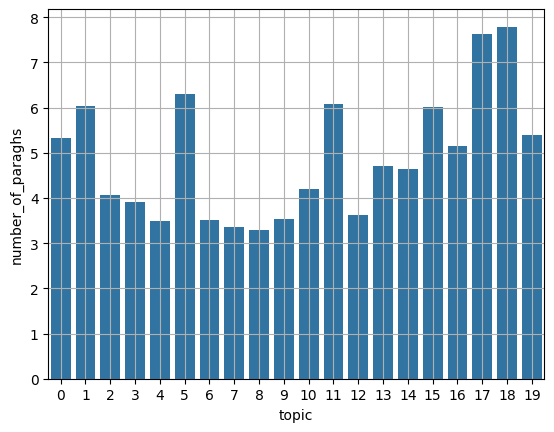

In [24]:
sns.barplot(
    data=tmp_df.groupby('topic').agg({'number_of_paraghs':'mean'}),
    x='topic',
    y='number_of_paraghs'
)
plt.grid()


In [25]:
tmp_df['text'].map(lambda text:re.split('[.?!]\n+ \\s*',text))[1]

['my brother is in the market for a high performance video card that supports vesa local bus with 1 2mb ram does anyone have suggestions ideas on diamond stealth pro local bus orchid farenheit 1280 ati graphics ultra pro any other high performance vlb card please post or email thank you matt']